In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos']

con_cols = ['C1', 'C2', 'I1', 'I2']
cov_thresh = [0, 10, 20]
final_con_cols = ['C1', 'C2', 'I1', 'I2', 'DP', 'Consistent rate', 'Inconsistent rate',
       'C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']

In [3]:
pd_exps = ['0_20', '10_20', '20_20', '30_20']
mux_exps = ['2_20', '6_20', '8_20', '10_20', '12_20', '14_20', '16_20']

In [4]:
!ls {indir}/

ls: cannot access {indir}/: No such file or directory


In [5]:
def process_con(con):
    con['DP'] = np.sum(con.iloc[:,:4], axis=1)
    con['Consistent rate'] = (con['C1'] + con['C2']) / con['DP']
    con['Inconsistent rate'] = 1 - con['Consistent rate']
    con['C1 rate'] = con['C1'] / con['DP']
    con['C2 rate'] = con['C2'] / con['DP']
    con['I1 rate'] = con['I1'] / con['DP']
    con['I2 rate'] = con['I2'] / con['DP']
    return con

In [6]:
cov = 0
indir = f'{projdir}/ambient/ambisim/prop_doub/csv/var_consistency/'
exp = pd_exps[0]

pd_gex_0 = pd.DataFrame(index=pd_exps, columns=final_con_cols, data=0)
pd_atac_0 = pd.DataFrame(index=pd_exps, columns=final_con_cols, data=0)

for exp in pd_exps:
    print(exp)
    gex_truth_con = pd.read_csv(f'{indir}/gex/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_gex = pd.DataFrame(np.sum(gex_truth_con.drop(columns=['donor']), axis=0)).transpose()
    pd_gex_0.loc[exp] = process_con(tmp_gex).values[0]
    
    atac_truth_con = pd.read_csv(f'{indir}/atac/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_atac = pd.DataFrame(np.sum(atac_truth_con.drop(columns=['donor']), axis=0)).transpose()
    pd_atac_0.loc[exp] = process_con(tmp_atac).values[0]

0_20
10_20
20_20
30_20


In [7]:
cov = 10
indir = f'{projdir}/ambient/ambisim/prop_doub/csv/var_consistency/'
exp = pd_exps[0]

pd_gex_10 = pd.DataFrame(index=pd_exps, columns=final_con_cols, data=0)
pd_atac_10 = pd.DataFrame(index=pd_exps, columns=final_con_cols, data=0)

for exp in pd_exps:
    print(exp)
    gex_truth_con = pd.read_csv(f'{indir}/gex/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_gex = pd.DataFrame(np.sum(gex_truth_con.drop(columns=['donor']), axis=0)).transpose()
    pd_gex_10.loc[exp] = process_con(tmp_gex).values[0]
    
    atac_truth_con = pd.read_csv(f'{indir}/atac/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_atac = pd.DataFrame(np.sum(atac_truth_con.drop(columns=['donor']), axis=0)).transpose()
    pd_atac_10.loc[exp] = process_con(tmp_atac).values[0]

0_20
10_20
20_20
30_20


In [8]:
cov = 20
indir = f'{projdir}/ambient/ambisim/prop_doub/csv/var_consistency/'
exp = pd_exps[0]

pd_gex_20 = pd.DataFrame(index=pd_exps, columns=final_con_cols, data=0)
pd_atac_20 = pd.DataFrame(index=pd_exps, columns=final_con_cols, data=0)

for exp in pd_exps:
    print(exp)
    gex_truth_con = pd.read_csv(f'{indir}/gex/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_gex = pd.DataFrame(np.sum(gex_truth_con.drop(columns=['donor']), axis=0)).transpose()
    pd_gex_20.loc[exp] = process_con(tmp_gex).values[0]
    
    atac_truth_con = pd.read_csv(f'{indir}/atac/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_atac = pd.DataFrame(np.sum(atac_truth_con.drop(columns=['donor']), axis=0)).transpose()
    pd_atac_20.loc[exp] = process_con(tmp_atac).values[0]

0_20
10_20
20_20
30_20


In [9]:
select = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
tmp_gex_0 = pd_gex_0[select]
tmp_gex_10 = pd_gex_10[select]
tmp_gex_20 = pd_gex_20[select]

tmp_gex_0['coverage'] = 0
tmp_gex_10['coverage'] = 10
tmp_gex_20['coverage'] = 20
gex_cov = pd.concat([tmp_gex_0, tmp_gex_10, tmp_gex_20])
gex_cov['prop'] = [x.split('_')[0] for x in gex_cov.index]

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [10]:
select = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
tmp_atac_0 = pd_atac_0[select]
tmp_atac_10 = pd_atac_10[select]
tmp_atac_20 = pd_atac_20[select]

tmp_atac_0['coverage'] = 0
tmp_atac_10['coverage'] = 10
tmp_atac_20['coverage'] = 20
atac_cov = pd.concat([tmp_atac_0, tmp_atac_10, tmp_atac_20])
atac_cov['prop'] = [x.split('_')[0] for x in atac_cov.index]

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [11]:
tmp_gex_cov = gex_cov[gex_cov['coverage'] == 0]
tmp_atac_cov = atac_cov[atac_cov['coverage'] == 0]

In [48]:
gex_cov

,C1 rate,C2 rate,I1 rate,I2 rate,coverage,prop
0_20,0.068644,0.918502,0.008127,0.004728,0,0
10_20,0.063313,0.908695,0.022968,0.005024,0,10
20_20,0.058353,0.897918,0.038298,0.005431,0,20
30_20,0.052730,0.887955,0.053423,0.005892,0,30
0_20,0.063677,0.932769,0.003343,0.000211,10,0
10_20,0.057230,0.919741,0.022004,0.001025,10,10
20_20,0.051500,0.906425,0.040211,0.001864,10,20
30_20,0.045489,0.894449,0.057342,0.002721,10,30
0_20,0.062418,0.934354,0.003152,0.000076,20,0
10_20,0.055558,0.920415,0.023015,0.001013,20,10


In [12]:
final_gex_cov = tmp_gex_cov.melt(id_vars=['prop'], value_vars=select)
final_atac_cov = tmp_atac_cov.melt(id_vars=['prop'], value_vars=select)
final_gex_cov['mod'] = 'gex'
final_atac_cov['mod'] = 'atac'

In [13]:
merged_cov = pd.concat([final_gex_cov, final_atac_cov])

In [14]:
# ax = sns.barplot(final_gex_cov, x='prop', y='value', hue='variable')
# ax.set_ylim(0, 1)
# ax.set_ylabel('')
# ax.set_xlabel('')

In [15]:
# ax = sns.barplot(final_atac_cov, x='prop', y='value', hue='variable')
# ax.set_ylim(0, 1)
# ax.set_ylabel('')
# ax.set_xlabel('')

In [16]:
atac_cov

,C1 rate,C2 rate,I1 rate,I2 rate,coverage,prop
0_20,0.083552,0.894680,0.012835,0.008932,0,0
10_20,0.080726,0.883915,0.025855,0.009504,0,10
20_20,0.077685,0.871658,0.040434,0.010223,0,20
30_20,0.074599,0.858513,0.055940,0.010948,0,30
0_20,0.068317,0.927679,0.003634,0.000369,10,0
10_20,0.067265,0.924858,0.007576,0.000300,10,10
20_20,0.065782,0.921519,0.012349,0.000350,10,20
30_20,0.065551,0.915906,0.018128,0.000414,10,30
0_20,0.067213,0.929582,0.003184,0.000021,20,0
10_20,0.066155,0.926745,0.007077,0.000023,20,10


C1 rate
C2 rate
I1 rate
I2 rate


Text(0.5, 0.04, 'Ambient proportion')

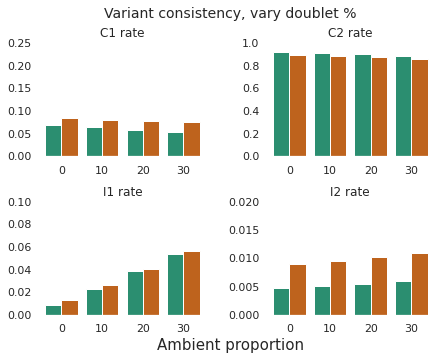

In [19]:
sns.set_theme(palette='Dark2')
ylims = [0.25, 1, 0.1, 0.02]
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
for i,ax in enumerate(axes.flatten()):
    col = select[i]
    lim = ylims[i]
    print(col)
    tmp_merged = merged_cov[merged_cov['variable'] == col]
    sns.barplot(tmp_merged, x='prop', y='value', hue='mod', ax=ax)
    ax.set_ylim(0, lim)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove()
    ax.set_title(col, fontsize=12)
    ax.grid(False)
    ax.set_facecolor('white')

plt.suptitle('Variant consistency, vary doublet %', fontsize=14)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the value as needed
fig.text(0.5, 0.04, 'Ambient proportion', ha='center', va='center', fontsize=15)

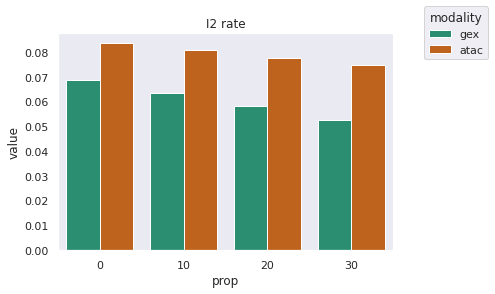

In [20]:
sns.set_theme(palette='Dark2')
tmp_merged = merged_cov[merged_cov['variable'] == select[0]]
ax = sns.barplot(tmp_merged, x='prop', y='value', hue='mod')
# ax.legend_.remove()
ax.legend(title='modality', bbox_to_anchor=(1.3, 1),loc='center right')
ax.set_title(col, fontsize=12)
ax.grid(False)
# ax.set_legend

### check effect of coverage

In [21]:
# test_gex = gex_cov.melt(id_vars=['prop'], value_vars=select)
# test_atac_cov = tmp_atac_cov.melt(id_vars=['prop'], value_vars=select)
# test_gex_cov['mod'] = 'gex'
# test_atac_cov['mod'] = 'atac'

In [22]:
test_gex_cov = gex_cov.melt(id_vars=['prop' , 'coverage'], value_vars=select)
test_atac_cov = atac_cov.melt(id_vars=['prop' , 'coverage'], value_vars=select)

In [23]:
test_gex_cov.head()

,prop,coverage,variable,value
0,0,0,C1 rate,0.068644
1,10,0,C1 rate,0.063313
2,20,0,C1 rate,0.058353
3,30,0,C1 rate,0.052730
4,0,10,C1 rate,0.063677


In [24]:
tmp_gex

,C1,C2,I1,I2,DP,Consistent rate,Inconsistent rate,C1 rate,C2 rate,I1 rate,I2 rate
0,144221,2955551,195980,9647,3305399,0.937791,0.062209,0.043632,0.894159,0.059291,0.002919


Text(0.5, 0, 'Ambient proportion')

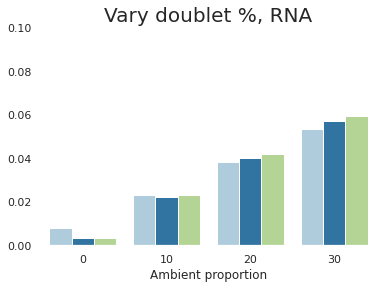

In [25]:
sns.set_theme(palette='Paired')
tmp_gex = test_gex_cov[test_gex_cov['variable'] == 'I1 rate']
ax = sns.barplot(tmp_gex, x='prop', y='value', hue='coverage')
ax.set_ylim(0, 0.1)
ax.grid(False)
ax.set_facecolor('white')
# ax.legend(title='coverage', bbox_to_anchor=(1.2, 1),loc='center right')
ax.legend().set_visible(False)
ax.set_title('Vary doublet %, RNA', size=20)
ax.set_ylabel('')
ax.set_xlabel('Ambient proportion')

Text(0.5, 0, 'Ambient proportion')

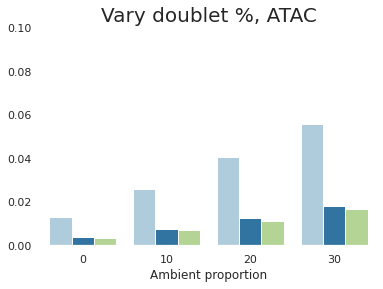

In [26]:
sns.set_theme(palette='Paired')
tmp_atac = test_atac_cov[test_atac_cov['variable'] == 'I1 rate']
ax = sns.barplot(tmp_atac, x='prop', y='value', hue='coverage')
ax.set_ylim(0, 0.1)
ax.grid(False)
ax.set_facecolor('white')
# ax.legend(title='coverage', bbox_to_anchor=(1.2, 1),loc='center right')
ax.legend().set_visible(False)
ax.set_title('Vary doublet %, ATAC', size=20)
ax.set_ylabel('')
ax.set_xlabel('Ambient proportion')

### um mux? lmao

In [27]:
!ls {projdir}/ambient/ambisim/mux_test/csv/var_consistency/gex/{s}/

10_20_cov0_all.csv     14_20_cov10_all.csv    2_20_cov20_all.csv
10_20_cov0_truth.csv   14_20_cov10_truth.csv  2_20_cov20_truth.csv
10_20_cov10_all.csv    14_20_cov20_all.csv    6_20_cov0_all.csv
10_20_cov10_truth.csv  14_20_cov20_truth.csv  6_20_cov0_truth.csv
10_20_cov20_all.csv    16_20_cov0_all.csv     6_20_cov10_all.csv
10_20_cov20_truth.csv  16_20_cov0_truth.csv   6_20_cov10_truth.csv
12_20_cov0_all.csv     16_20_cov10_all.csv    6_20_cov20_all.csv
12_20_cov0_truth.csv   16_20_cov10_truth.csv  6_20_cov20_truth.csv
12_20_cov10_all.csv    16_20_cov20_all.csv    8_20_cov0_all.csv
12_20_cov10_truth.csv  16_20_cov20_truth.csv  8_20_cov0_truth.csv
12_20_cov20_all.csv    2_20_cov0_all.csv      8_20_cov10_all.csv
12_20_cov20_truth.csv  2_20_cov0_truth.csv    8_20_cov10_truth.csv
14_20_cov0_all.csv     2_20_cov10_all.csv     8_20_cov20_all.csv
14_20_cov0_truth.csv   2_20_cov10_truth.csv   8_20_cov20_truth.csv


In [28]:
cov = 0
indir = f'{projdir}/ambient/ambisim/mux_test/csv/var_consistency/'
exp = mux_exps[0]

mux_gex_0 = pd.DataFrame(index=mux_exps, columns=final_con_cols, data=0)
mux_atac_0 = pd.DataFrame(index=mux_exps, columns=final_con_cols, data=0)

for exp in mux_exps:
    print(exp)
    gex_truth_con = pd.read_csv(f'{indir}/gex/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_gex = pd.DataFrame(np.sum(gex_truth_con.drop(columns=['donor']), axis=0)).transpose()
    mux_gex_0.loc[exp] = process_con(tmp_gex).values[0]
    
    atac_truth_con = pd.read_csv(f'{indir}/atac/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_atac = pd.DataFrame(np.sum(atac_truth_con.drop(columns=['donor']), axis=0)).transpose()
    mux_atac_0.loc[exp] = process_con(tmp_atac).values[0]

2_20
6_20
8_20
10_20
12_20
14_20
16_20


In [29]:
cov = 10
indir = f'{projdir}/ambient/ambisim/mux_test/csv/var_consistency/'
exp = mux_exps[0]

mux_gex_10 = pd.DataFrame(index=mux_exps, columns=final_con_cols, data=0)
mux_atac_10 = pd.DataFrame(index=mux_exps, columns=final_con_cols, data=0)

for exp in mux_exps:
    print(exp)
    gex_truth_con = pd.read_csv(f'{indir}/gex/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_gex = pd.DataFrame(np.sum(gex_truth_con.drop(columns=['donor']), axis=0)).transpose()
    mux_gex_10.loc[exp] = process_con(tmp_gex).values[0]
    
    atac_truth_con = pd.read_csv(f'{indir}/atac/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_atac = pd.DataFrame(np.sum(atac_truth_con.drop(columns=['donor']), axis=0)).transpose()
    mux_atac_10.loc[exp] = process_con(tmp_atac).values[0]

2_20
6_20
8_20
10_20
12_20
14_20
16_20


In [30]:
cov = 20
indir = f'{projdir}/ambient/ambisim/mux_test/csv/var_consistency/'
exp = mux_exps[0]

mux_gex_20 = pd.DataFrame(index=mux_exps, columns=final_con_cols, data=0)
mux_atac_20 = pd.DataFrame(index=mux_exps, columns=final_con_cols, data=0)

for exp in mux_exps:
    print(exp)
    gex_truth_con = pd.read_csv(f'{indir}/gex/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_gex = pd.DataFrame(np.sum(gex_truth_con.drop(columns=['donor']), axis=0)).transpose()
    mux_gex_20.loc[exp] = process_con(tmp_gex).values[0]
    
    atac_truth_con = pd.read_csv(f'{indir}/atac/{s}/{exp}_cov{cov}_truth.csv', sep='\t', header=0, index_col=0)
    tmp_atac = pd.DataFrame(np.sum(atac_truth_con.drop(columns=['donor']), axis=0)).transpose()
    mux_atac_20.loc[exp] = process_con(tmp_atac).values[0]

2_20
6_20
8_20
10_20
12_20
14_20
16_20


In [31]:
select = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
tmp_mux_gex_0 = mux_gex_0[select]
tmp_mux_gex_10 = mux_gex_10[select]
tmp_mux_gex_20 = mux_gex_20[select]

tmp_mux_gex_0['coverage'] = 0
tmp_mux_gex_10['coverage'] = 10
tmp_mux_gex_20['coverage'] = 20
gex_mux_cov = pd.concat([tmp_mux_gex_0, tmp_mux_gex_10, tmp_mux_gex_20])
gex_mux_cov['donors'] = [x.split('_')[0] for x in gex_mux_cov.index]

tmp_mux_atac_0 = mux_atac_0[select]
tmp_mux_atac_10 = mux_atac_10[select]
tmp_mux_atac_20 = mux_atac_20[select]

tmp_mux_atac_0['coverage'] = 0
tmp_mux_atac_10['coverage'] = 10
tmp_mux_atac_20['coverage'] = 20
atac_mux_cov = pd.concat([tmp_mux_atac_0, tmp_mux_atac_10, tmp_mux_atac_20])
atac_mux_cov['donors'] = [x.split('_')[0] for x in atac_mux_cov.index]

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [32]:
gex_mux_cov

,C1 rate,C2 rate,I1 rate,I2 rate,coverage,donors
2_20,0.210660,0.750406,0.032300,0.006634,0,2
6_20,0.029819,0.926018,0.040787,0.003376,0,6
8_20,0.018912,0.935830,0.042121,0.003138,0,8
10_20,0.014137,0.940681,0.042633,0.002549,0,10
12_20,0.011689,0.942475,0.043557,0.002279,0,12
14_20,0.009736,0.944714,0.043488,0.002062,0,14
16_20,0.008695,0.946250,0.043204,0.001851,0,16
2_20,0.205120,0.758716,0.033618,0.002546,10,2
6_20,0.019511,0.934884,0.045218,0.000386,10,6
8_20,0.009413,0.943203,0.047053,0.000332,10,8


In [33]:
atac_mux_cov

,C1 rate,C2 rate,I1 rate,I2 rate,coverage,donors
2_20,0.235608,0.721922,0.031502,0.010969,0,2
6_20,0.048698,0.901864,0.042290,0.007148,0,6
8_20,0.034473,0.915797,0.043022,0.006708,0,8
10_20,0.027267,0.923313,0.043847,0.005573,0,10
12_20,0.022830,0.927220,0.044891,0.005059,0,12
14_20,0.019297,0.930743,0.045360,0.004600,0,14
16_20,0.017265,0.933288,0.045355,0.004091,0,16
2_20,0.230906,0.759700,0.008898,0.000495,10,2
6_20,0.033497,0.952465,0.013723,0.000315,10,6
8_20,0.019331,0.966415,0.013853,0.000401,10,8


In [34]:
tmp_gex_mux_cov = gex_mux_cov[gex_mux_cov['coverage'] == 0]
tmp_atac_mux_cov = atac_mux_cov[atac_mux_cov['coverage'] == 0]
final_gex_mux_cov = tmp_gex_mux_cov.melt(id_vars=['donors'], value_vars=select)
final_atac_mux_cov = tmp_atac_mux_cov.melt(id_vars=['donors'], value_vars=select)
final_gex_mux_cov['mod'] = 'gex'
final_atac_mux_cov['mod'] = 'atac'
merged_mux_cov = pd.concat([final_gex_mux_cov, final_atac_mux_cov])

I2 rate
C1 rate
C2 rate
I1 rate


Text(0.5, 0.04, '# muxed donors')

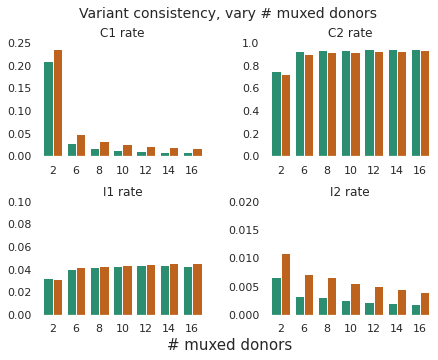

In [35]:
sns.set_theme(palette='Dark2')
# fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# for i,ax in enumerate(axes.flatten()):
#     print(col)
#     col = select[i]
#     tmp_merged = merged_mux_cov[merged_mux_cov['variable'] == col]
#     sns.barplot(tmp_merged, x='donors', y='value', hue='mod', ax=ax)
#     ax.set_ylim(0, 1)
#     ax.set_ylabel('')
#     ax.set_xlabel('')
#     ax.legend_.remove()

ylims = [0.25, 1, 0.1, 0.02]

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
for i,ax in enumerate(axes.flatten()):
    print(col)
    col = select[i]
    lim = ylims[i]
    tmp_merged = merged_mux_cov[merged_mux_cov['variable'] == col]
    sns.barplot(tmp_merged, x='donors', y='value', hue='mod', ax=ax)
    ax.set_ylim(0, lim)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove()
    ax.set_title(col, fontsize=12)
    ax.grid(False)
    ax.set_facecolor('white')
    ax.grid(False)

plt.suptitle('Variant consistency, vary # muxed donors ', fontsize=14)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the value as needed
fig.text(0.5, 0.04, '# muxed donors', ha='center', va='center', fontsize=15)

In [37]:
test_mux_gex_cov = gex_mux_cov.melt(id_vars=['donors' , 'coverage'], value_vars=select)
test_mux_atac_cov = atac_mux_cov.melt(id_vars=['donors' , 'coverage'], value_vars=select)

Text(0.5, 1.0, 'Vary # muxed donors, RNA')

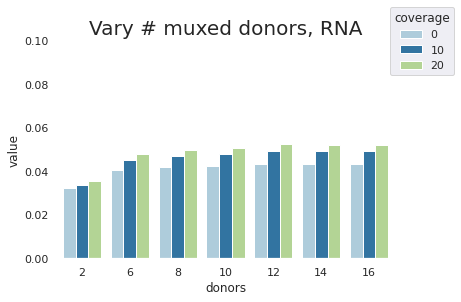

In [38]:
sns.set_theme(palette='Paired')
tmp_gex = test_mux_gex_cov[test_mux_gex_cov['variable'] == 'I1 rate']
ax = sns.barplot(tmp_gex, x='donors', y='value', hue='coverage')
ax.set_ylim(0, 0.1)
ax.grid(False)
ax.set_facecolor('white')
ax.legend(title='coverage', bbox_to_anchor=(1.2, 1),loc='center right')
ax.set_title('Vary # muxed donors, RNA', size=20)

Text(0, 0.5, '')

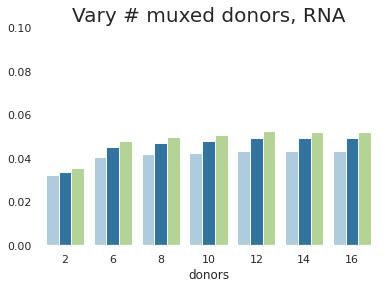

In [39]:
sns.set_theme(palette='Paired')
tmp_gex = test_mux_gex_cov[test_mux_gex_cov['variable'] == 'I1 rate']
ax = sns.barplot(tmp_gex, x='donors', y='value', hue='coverage')
ax.set_ylim(0, 0.1)
ax.grid(False)
ax.set_facecolor('white')
# ax.legend(title='coverage', bbox_to_anchor=(1.2, 1),loc='center right')
ax.legend().set_visible(False)
ax.set_title('Vary # muxed donors, RNA', size=20)
ax.set_ylabel('')

Text(0, 0.5, '')

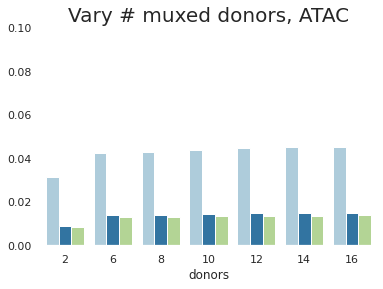

In [40]:
sns.set_theme(palette='Paired')
tmp_atac = test_mux_atac_cov[test_mux_atac_cov['variable'] == 'I1 rate']
ax = sns.barplot(tmp_atac, x='donors', y='value', hue='coverage')
ax.set_ylim(0, 0.1)
ax.grid(False)
ax.set_facecolor('white')
# ax.legend(title='coverage', bbox_to_anchor=(1.2, 1),loc='center right')
ax.legend().set_visible(False)
ax.set_title('Vary # muxed donors, ATAC', size=20)
ax.set_ylabel('')

I2 rate
C1 rate
C2 rate
I1 rate


Text(0.5, 0.04, '# muxed donors')

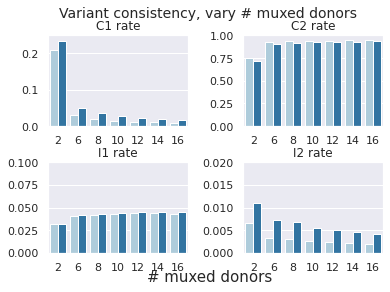

In [41]:
ylims = [0.25, 1, 0.1, 0.02]

fig, axes = plt.subplots(2, 2, figsize=(6, 4))
for i,ax in enumerate(axes.flatten()):
    print(col)
    col = select[i]
    lim = ylims[i]
    tmp_merged = merged_mux_cov[merged_mux_cov['variable'] == col]
    sns.barplot(tmp_merged, x='donors', y='value', hue='mod', ax=ax)
    ax.set_ylim(0, lim)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove()
    ax.set_title(col, fontsize=12)

plt.suptitle('Variant consistency, vary # muxed donors ', fontsize=14)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the value as needed
fig.text(0.5, 0.04, '# muxed donors', ha='center', va='center', fontsize=15)

In [46]:
merged_cov.index.name = 'index'
merged_mux_cov.index.name = 'index'

In [47]:
### 5b
merged_cov.to_csv(f'{projdir}/csv/final_figures/figure5/figure_5b_pd.csv', sep='\t', header=True, index=True)
merged_mux_cov.to_csv(f'{projdir}/csv/final_figures/figure5/figure_5b_mux.csv', sep='\t', header=True, index=True)

In [53]:
test_mux_gex_cov, test_mux_atac_cov

(   donors  coverage variable     value
 0       2         0  C1 rate  0.210660
 1       6         0  C1 rate  0.029819
 2       8         0  C1 rate  0.018912
 3      10         0  C1 rate  0.014137
 4      12         0  C1 rate  0.011689
 ..    ...       ...      ...       ...
 79      8        20  I2 rate  0.000255
 80     10        20  I2 rate  0.000100
 81     12        20  I2 rate  0.000045
 82     14        20  I2 rate  0.000030
 83     16        20  I2 rate  0.000023
 
 [84 rows x 4 columns],
    donors  coverage variable     value
 0       2         0  C1 rate  0.235608
 1       6         0  C1 rate  0.048698
 2       8         0  C1 rate  0.034473
 3      10         0  C1 rate  0.027267
 4      12         0  C1 rate  0.022830
 ..    ...       ...      ...       ...
 79      8        20  I2 rate  0.000075
 80     10        20  I2 rate  0.000075
 81     12        20  I2 rate  0.000048
 82     14        20  I2 rate  0.000070
 83     16        20  I2 rate  0.000045
 
 [84 rows x 

In [54]:
### s12?
### s12?
test_gex_cov.to_csv(f'{projdir}/csv/final_figures/figure5/figure_s12_pd_gex_cov.csv', sep='\t', header=True, index=True)
test_atac_cov.to_csv(f'{projdir}/csv/final_figures/figure5/figure_s12_pd_atac_cov.csv', sep='\t', header=True, index=True)
test_mux_gex_cov.to_csv(f'{projdir}/csv/final_figures/figure5/figure_s12_mux_gex_cov.csv', sep='\t', header=True, index=True)
test_mux_atac_cov.to_csv(f'{projdir}/csv/final_figures/figure5/figure_s12_mux_atac_cov.csv', sep='\t', header=True, index=True)